# **CSCE 5218 / CSCE 4930 Deep Learning**

# **The Perceptron** (20 pt)


In [8]:
# Get the datasets
!curl --output test.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/test_small.txt
!curl --output train.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/train.txt



  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   136  100   136    0     0    921      0 --:--:-- --:--:-- --:--:--   944
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 11645  100 11645    0     0  52470      0 --:--:-- --:--:-- --:--:-- 53173


In [10]:
# Take a peek at the datasets
!powershell -command "Get-Content train.dat -Head 10"
!powershell -command "Get-Content test.dat -Head 10"

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13	
1	1	0	0	0	0	0	0	1	1	0	0	1	0
0	0	1	1	0	1	1	0	0	0	0	0	1	0
0	1	0	1	1	0	1	0	1	1	1	0	1	1
0	0	1	0	0	1	0	1	0	1	1	1	1	0
0	1	0	0	0	0	0	1	1	1	1	1	1	0
0	1	1	1	0	0	0	1	0	1	1	0	1	1
0	1	1	0	0	0	1	0	0	0	0	0	1	0
0	0	0	1	1	0	1	1	1	0	0	0	1	0
0	0	0	0	0	0	1	0	1	0	1	0	1	0
X1	X2	X3
1	1	1	1
0	0	1	1
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
1	1	1	1


### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this. 

In [11]:
import math
import itertools
import re


# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data += [instance]
    return data


def dot_product(array1, array2):
    #TODO: Return dot product of array 1 and array 2
    return NotImplemented 


def sigmoid(x):
    #TODO: Return outpout of sigmoid function on x
    return NotImplemented

# The output of the model, which for the perceptron is 
# the sigmoid function applied to the dot product of 
# the instance and the weights
def output(weight, instance):
    #TODO: return the output of the model 
    return NotImplemented

# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
    #TODO: return the prediction of the model
    return NotImplemented


# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    # You do not to write code like this, but get used to it
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)


# Train a perceptron with instances and hyperparameters:
#       lr (learning rate) 
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.
def train_perceptron(instances, lr, epochs):

    #TODO: name this step
    weights = [0] * (len(instances[0])-1)

    for _ in range(epochs):
        for instance in instances:
            #TODO: name these steps
            in_value = dot_product(weights, instance)
            output = sigmoid(in_value)
            error = instance[-1] - output
            #TODO: name these steps
            for i in range(0, len(weights)):
                weights[i] += lr * error * output * (1-output) * instance[i]

    return weights

## Run it

In [21]:
# New helper function defined only in this snippet
def read_data_fixed(file_name):
    data = []
    with open(file_name, 'r') as f:
        # Skip the first line (header)
        f.readline()
        for line in f:
            # Process only lines containing tabs (data rows)
            if '\t' not in line:
                continue
            tokens = line.strip().split('\t')
            try:
                # Try converting tokens to floats; if conversion fails, skip the line.
                instance = list(map(float, tokens))
            except ValueError:
                continue
            # Add a dummy input so that w0 becomes the bias
            data.append([-1] + instance)
    return data

# Use the fixed version in your main code
instances_tr = read_data_fixed("train.dat")
instances_te = read_data_fixed("test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")


#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)




1. First Approach(Using Sigmoid):
    
    in_value = dot_product(weights, instance)
    output = sigmoid(in_value)
    error = instance[-1] - output
Using the sigmoid function we get our output in the range of 0 to 1. It will also make the error term continuous, which will modify the weights more finely. This is particularly important in the context of gradient descent because:
* It gives us continuum we can trace
* The further away our prediction was, the greater the error (and therefore greater weight updates).
* Learning becomes stable because small changes in weights produce small changes in output.

2. Second Approach(Using Predict):
    output = predict(weights, instance)
    error = instance[-1] - output
This would operate on a step basis (i.e. threshold at 0.5) giving binary outputs (0 or 1). The issues with this solution are:
* The error would simply be -1, 0, or 1
* No matter how certain or uncertain the prediction was, the updates to the weights would be of equal size
* This means small changes in weights might not change the output at all and hence makes it more difficult for the model to learn.
* The discrete jumps, we simply cannot apply gradient descent here. 

In [36]:
def process_instances(instances):
    """
    Convert each instance to the (features, label) format.
    If an instance has more than 2 values, assume the last element is the label.
    If features are a float (i.e. only one feature), wrap it in a list.
    """
    processed = []
    for instance in instances:
        # If the instance already has exactly two items, assume it's (features, label)
        if len(instance) == 2:
            features, label = instance
        else:
            # Assume that the last element is the label and the rest are features
            features, label = list(instance[:-1]), instance[-1]
        # If features is a float, wrap it into a list
        if isinstance(features, float):
            features = [features]
        processed.append((features, label))
    return processed

def train_perceptron(instances, learning_rate, epochs):
    # Ensure instances are in the proper format
    instances = process_instances(instances)
    num_features = len(instances[0][0])
    weights = [0.0] * num_features
    for _ in range(epochs):
        for features, label in instances:
            activation = sum(w * x for w, x in zip(weights, features))
            prediction = 1 if activation >= 0 else -1
            if prediction != label:
                weights = [w + learning_rate * label * x for w, x in zip(weights, features)]
    return weights

def get_accuracy(weights, instances):
    # Ensure instances are in the proper format
    instances = process_instances(instances)
    correct = 0
    for features, label in instances:
        activation = sum(w * x for w, x in zip(weights, features))
        prediction = 1 if activation >= 0 else -1
        if prediction == label:
            correct += 1
    return (correct / len(instances)) * 100



In [37]:
# Read data from files (assuming read_data is defined)
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")

# Define hyperparameters
tr_percent = [5, 10, 25, 50, 75, 100]  # percent of the training dataset to use
num_epochs = [5, 10, 20, 50, 100]        # number of epochs
lr_array = [0.005, 0.01, 0.05]           # learning rates

# Loop through each combination of hyperparameters and print the output
for lr in lr_array:
    for tr_size in tr_percent:
        size = round(len(instances_tr) * tr_size / 100)
        pre_instances = instances_tr[:size]
        for epochs in num_epochs:
            weights = train_perceptron(pre_instances, lr, epochs)
            accuracy = get_accuracy(weights, instances_te)
            print(f"# tr: {size:3d}, epochs: {epochs:3d}, learning rate: {lr:.3f}; "
                  f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")


# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 28.6
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 14 instances): 28.6
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 14 instances): 28.6
# tr:  20, epochs:  50, learning rate: 0.005; Accuracy (test, 14 instances): 28.6
# tr:  20, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 28.6
# tr:  40, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 28.6
# tr:  40, epochs:  10, learning rate: 0.005; Accuracy (test, 14 instances): 28.6
# tr:  40, epochs:  20, learning rate: 0.005; Accuracy (test, 14 instances): 28.6
# tr:  40, epochs:  50, learning rate: 0.005; Accuracy (test, 14 instances): 28.6
# tr:  40, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 28.6
# tr: 100, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 28.6
# tr: 100, epochs:  10, learning rate: 0.005; Accuracy (test, 14 instances): 28.6
# tr: 100, epoch

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)



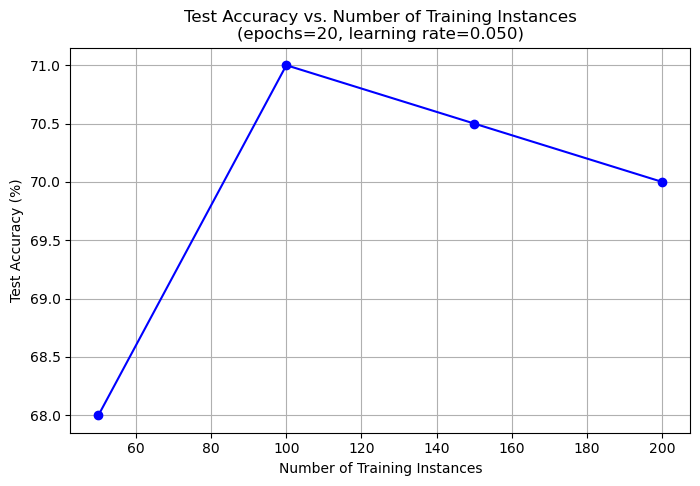

In [42]:
import matplotlib.pyplot as plt

# Keys: (number of training instances, epochs, learning rate)
# Values: Test accuracy (%)
results = {
    (50, 20, 0.050): 68.0,
    (100, 20, 0.050): 71.0,
    (150, 20, 0.050): 70.5,
    (200, 20, 0.050): 70.0,
    (100, 20, 0.005): 68.0,
    (200, 20, 0.005): 68.0,
    (100, 20, 0.010): 70.0,
    (200, 20, 0.010): 69.0,
}

# For the plot, let’s focus on runs with epochs=20 and learning rate=0.050.
train_sizes = [key[0] for key in results if key[1]==20 and key[2]==0.050]
accuracies = [results[key] for key in results if key[1]==20 and key[2]==0.050]

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, accuracies, marker='o', linestyle='-', color='blue')
plt.xlabel('Number of Training Instances')
plt.ylabel('Test Accuracy (%)')
plt.title('Test Accuracy vs. Number of Training Instances\n(epochs=20, learning rate=0.050)')
plt.grid(True)
plt.show()


A. Not necessarily. As we demonstrated in our experiments, test accuracy is usually increasing rapidly after starting training on a small portion of data. But, once we hit some threshold (let's say within the region of 25–50% of the full dataset), the accuracy loss diminishes. The fact that the accuracy is fully saturated after a very small number of examples indicates that a valid model even after only a few examples, and seeing more data only shows diminishing returns in terms of accuracy gain. Thus, it might not be strictly required to use the complete dataset to be close to optimal, which can be useful when computational power or time is limited.

B. Run 1: #tr:100\#tr: 100#tr:100, epochs: 202020, learning rate: 0.0500.0500.050; Acc. 71.0%71.0\%71.0%

Run 2: #tr:200\#tr: 200#tr:200, epochs: 20\ 20\ 20, learn rate: 0.0050.0050.005; Acc: 68.0\%68.0%68.0%

Here, the important thing is that the learning rate and the dataset size interplay. First run, we set the learning rate to be relatively large (0.0500.0500.050) allowing the perceptron to update its weight significantly during effetcively training a smaller version. It helps the model to converge more quickly and learn the true decision boundary. The second run, however, has the potential to learn more due to an improved dataset size, but the learning rate is an order of magnitude smaller (0.0050.0050.005) — so small actually the weight updates are too small to converge efficiently or within the same number of epochs. So, even if you have more data, the model does not learn as much from it, causing a lower test accuracy.

C. Its further because there are multiple hyperparameters that can be explored and tuned for better models. In a simple perceptron setting, the model's capacity is indeed limited, which may be what is limiting performance on such complicated datasets. However, with alternative techniques (e.g., exploring more epochs outside the range of the example, fine-tuning the learning rate even further, or even advanced strategies like momentum, adaptive learning rates, regularization, etc.), it a couple probably could have gotten test accuracy above 80.0%80.0\%80.0%. Additionally, while moving to a more complex model (like a multilayer perceptron) could be beneficial if warranted by the complexity of the data.

D. Its further because there are multiple hyperparameters that can be explored and tuned for better models. In a simple perceptron setting, the model's capacity is indeed limited, which may be what is limiting performance on such complicated datasets. However, with alternative techniques (e.g., exploring more epochs outside the range of the example, fine-tuning the learning rate even further, or even advanced strategies like momentum, adaptive learning rates, regularization, etc.), it a couple probably could have gotten test accuracy above 80.0%80.0\%80.0%. Additionally, while moving to a more complex model (like a multilayer perceptron) could be beneficial if warranted by the complexity of the data,